In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')

In [3]:
print(df.sample(5))

        Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
71807      1562952  19.03.2018 06:52   19.03.2018               06:52   
234766     1739540  25.09.2018 09:04   25.09.2018               09:04   
135293     1660653  29.05.2018 14:15   29.05.2018               14:15   
153467     1674766  15.06.2018 17:35   15.06.2018               17:35   
248303     1752355  13.10.2018 21:19   13.10.2018               21:19   

          Starttidspunkt   Startdato Startklokkeslett Startposisjon bredde  \
71807   17.03.2018 22:57  17.03.2018            22:57               71,437   
234766  24.09.2018 00:29  24.09.2018            00:29               71,557   
135293  29.05.2018 00:19  29.05.2018            00:19               58,617   
153467  15.06.2018 04:23  15.06.2018            04:23                 70,4   
248303  13.10.2018 19:22  13.10.2018            19:22               75,434   

       Startposisjon lengde  Hovedområde start (kode)  ...     Art - FDIR  \
71807          

In [5]:
df.dtypes

Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [6]:
unique = df['Fartøylengde'].unique()
print(unique)

['133,88' '56,8' '19,1' '49,95' '27,49' '46,58' '24,27' '56,2' '51,3'
 '23,27' '27,4' '51,2' '81,2' '46,57' '75,5' '39,79' '44,85' '42,07'
 '50,8' '45,65' '65' '20,93' '84,21' '58' '74,7' '60' '53,1' '26,4' '50,2'
 '55' '57,3' '64,7' '69,7' '54,6' '64' '23,9' '19,48' '20,21' '18,52' '22'
 '15,36' '22,5' '15,5' '27,43' '33,63' '18,05' '16,88' '40,3' '19,42'
 '28,1' '17,59' '17,67' '36,26' '25,5' '20,48' '32,55' '25,84' '38,7'
 '19,26' '51,7' '18,4' '25,07' '17,84' '23,1' '22,05' '27,13' '31,7'
 '33,95' '74' '19,9' '23,95' '34,99' '16,1' '22,15' '20,99' '26,2' '27,47'
 '18,25' '26,5' '17' '21,34' '39,94' '34' '21,3' '49,48' '44,8' '38,08'
 '38,78' '19,68' '23,79' '30,35' '68,8' '18,8' '16,24' '15,44' '18,03'
 '18,6' '68,3' '39,9' '74,2' '27,97' '60,9' '56' '38,24' '53,55' '23'
 '27,96' '43,2' '26,25' '44,95' '66,28' '76,4' '45,42' '38,1' '19,95'
 '34,07' '36,39' '59,75' '69,8' '67,4' '33,46' '61,75' '23,56' '24,05'
 '26' '19,8' '40,6' '27,15' '37,9' '74,8' '34,85' '27,42' '70' '69,77'
 '

In [7]:
df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde                       '] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df.dtypes

Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

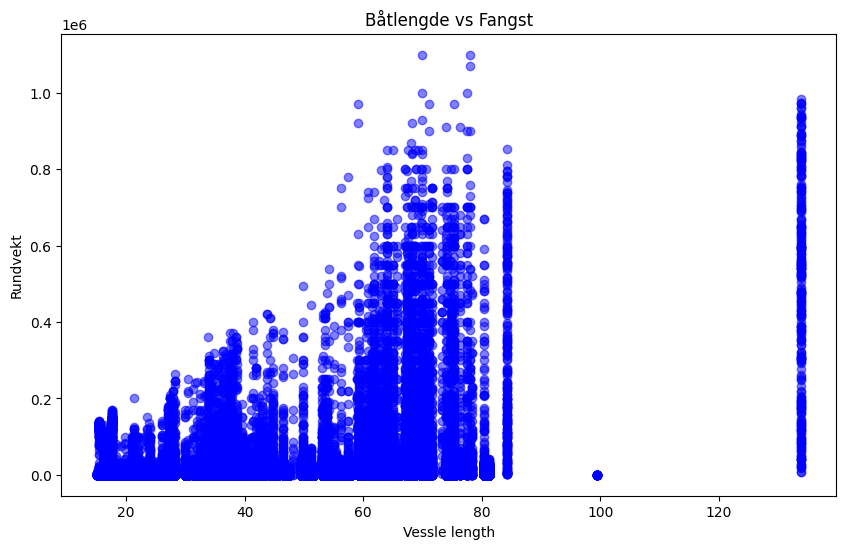

In [21]:
# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fartøylengde'], df['Rundvekt'], color='blue', alpha=0.5)  # alpha just controls transparency
plt.title('Båtlengde vs Fangst')
plt.xlabel('Vessle length')
plt.ylabel('Rundvekt')
plt.show()

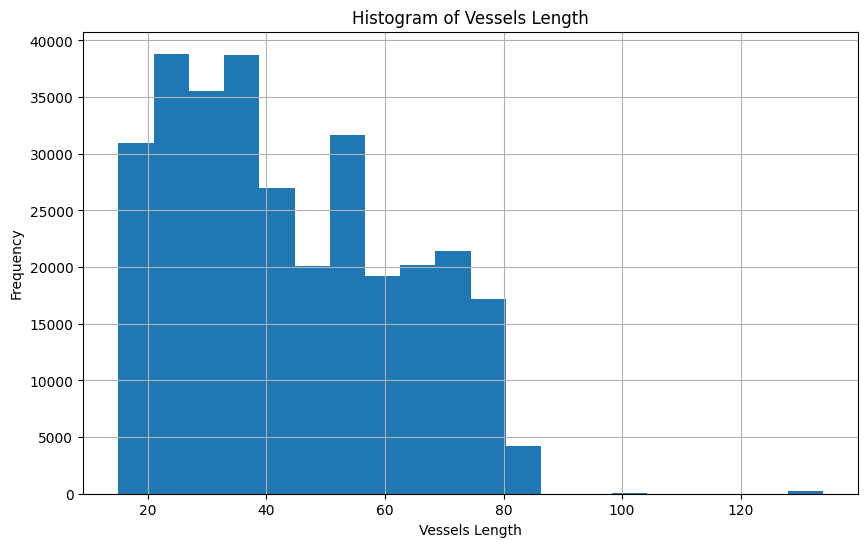

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fartøylengde'], bins=20)
plt.title('Histogram of Vessels Length')
plt.xlabel('Vessels Length')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

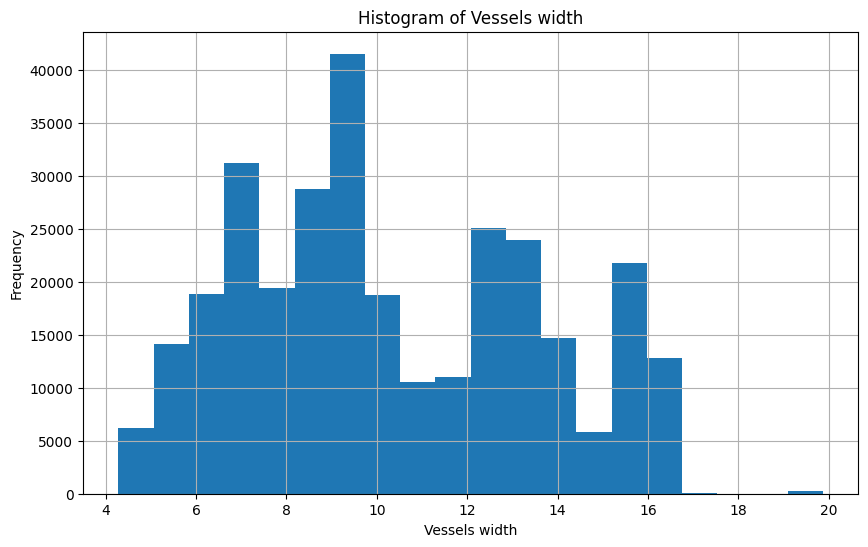

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Bredde'], bins=20)
plt.title('Histogram of Vessels width')
plt.xlabel('Vessels width')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [27]:
unique = df['Art - FDIR'].unique()
print(unique)

['Antarktisk krill' 'Hyse' 'Torsk' 'Blåkveite' 'Sei' 'Flekksteinbit'
 'Kveite' 'Snabeluer' 'Uer (vanlig)' 'Rødspette' 'Snøkrabbe' 'Lange'
 'Blåsteinbit' 'Breiflabb' 'Akkar' 'Hvitting' 'Lysing' nan 'Brosme'
 'Annen marin fisk' 'Antarktisk tannfisk' 'Steinbiter' 'Dypvannsreke'
 'Skate, uspes.' 'Reke av  Pandalusslekten' 'Øyepål' 'Smørflyndre'
 'Stortare' 'Annen skate og rokke' 'Lyr' 'Sjøkreps'
 'Vanlig ti-armet blekksprut, uspes.' 'Pigghå' 'Pink cusk-eel *'
 'Glassvar' 'Brisling' 'Isgalt' 'Gråsteinbit' 'Storskate' 'Sild'
 'Blålange' 'Skater, uspes.' 'Annen flyndre' 'Gapeflyndre' 'Skrubbe'
 'Makrell' 'Hestmakrell' 'Vassild' 'Kolmule' 'Lomre'
 'Annen vanlig ti-armet blekksprut' 'Hågjel' 'Kongekrabbe' 'Skjellbrosme'
 'Uer, uspes.' 'Havmus' 'Piggvar' 'Rognkjeks (felles)' 'Lodde'
 'Strømsild/Vassild' 'Reke av  Palaemonidaeslekten' 'Slettvar' 'Piggskate'
 'Sagtang' 'Southern hake *' 'Nise' 'Håbrann' 'Knurr' 'Sandflyndre'
 'Skolest' 'Rødknurr' 'Svarthå' 'Strømsild' 'Sølvtorsk' 'Annen blekksprut

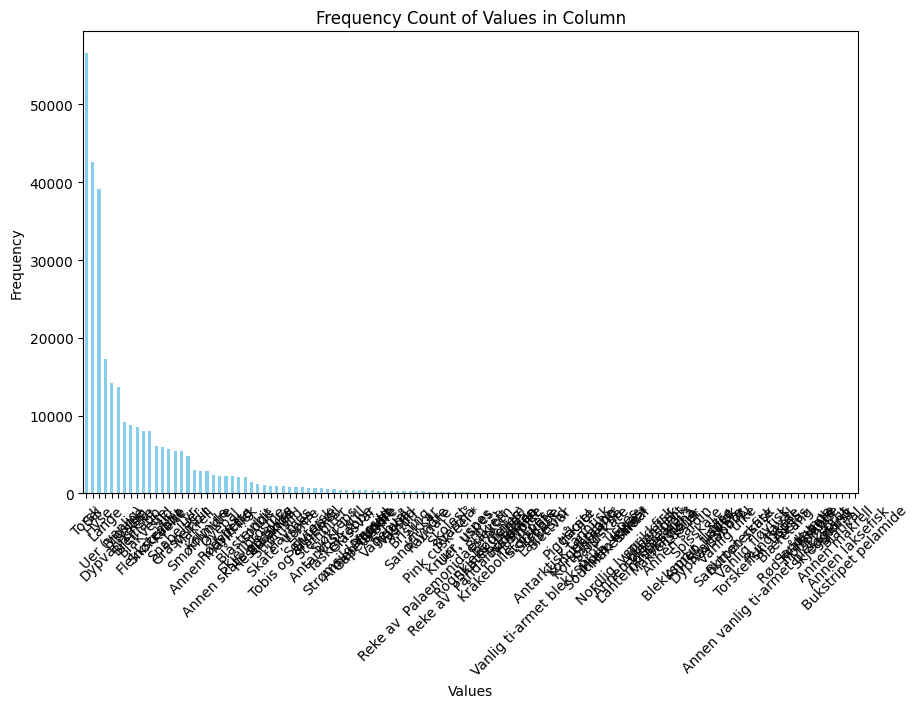

In [34]:
# Forutsetter at du har et DataFrame kalt df med kolonnen du vil telle frekvensen for

# Get frequency counts of values in the column
frequency_counts = df['Art - FDIR'].value_counts()

# Plot bar plot using Pandas built-in plotting
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Count of Values in Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()


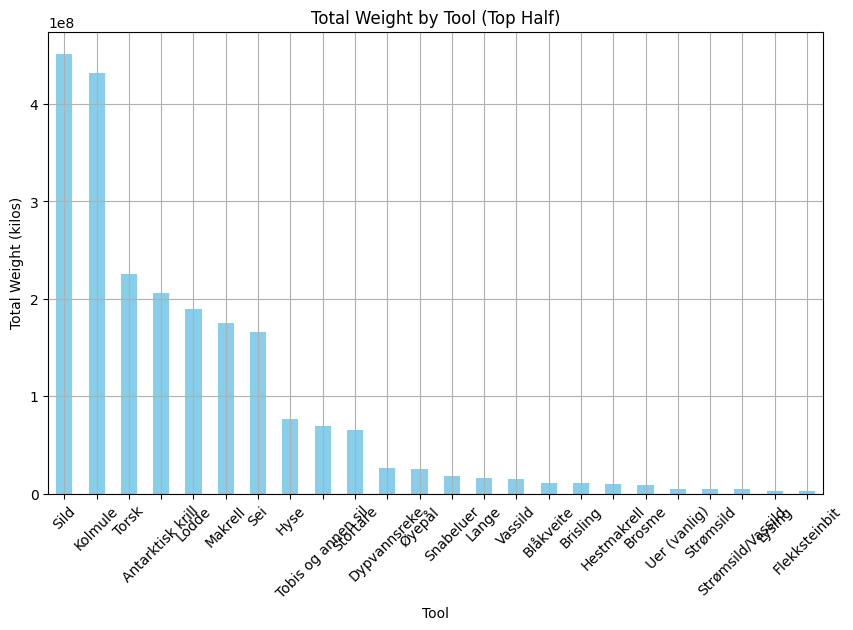

In [45]:
# Group the data by "Redskap" and sum the "Rundvekt" for each group
tool_weight = df.groupby('Art - FDIR')['Rundvekt'].sum()

# Sort the summed weights in descending order
sorted_tool_weight = tool_weight.sort_values(ascending=False)

# Select the top half of the sums
top_half = sorted_tool_weight.head(len(sorted_tool_weight) // 5)

# Plot bar plot
plt.figure(figsize=(10, 6))
top_half.plot(kind='bar', color='skyblue')
plt.title('Total Weight by Tool (Top Half)')
plt.xlabel('Tool')
plt.ylabel('Total Weight (kilos)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

In [35]:
unique = df['Redskap FDIR'].unique()
print(unique)

['Flytetrål' 'Bunntrål' 'Snurrevad' 'Teiner' 'Udefinert garn'
 'Andre liner' 'Dobbeltrål' 'Udefinert trål' 'Bunntrål par' 'Reketrål'
 'Annet' 'Snurpenot/ringnot' 'Flytetrål par' 'Settegarn' nan 'Juksa/pilk'
 'Harpun og lignende uspesifiserte typer' 'Dorg/harp/snik']


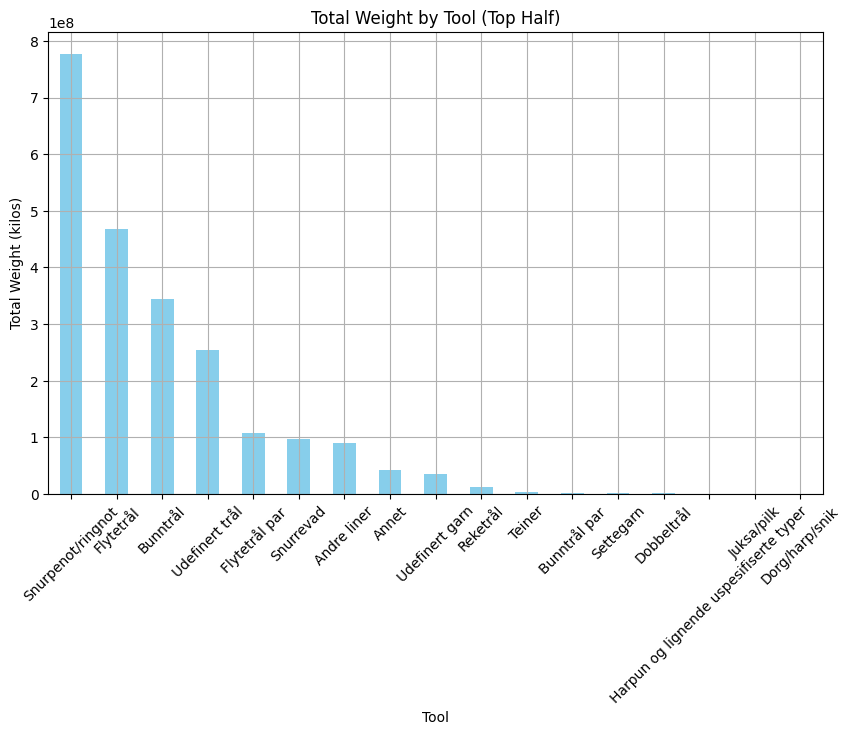

In [41]:
# Group the data by "Redskap" and sum the "Rundvekt" for each group
tool_weight = df.groupby('Redskap FDIR')['Rundvekt'].sum()

# Sort the summed weights in descending order
sorted_tool_weight = tool_weight.sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(10, 6))
sorted_tool_weight.plot(kind='bar', color='skyblue')
plt.title('Total Weight by Tool (Top Half)')
plt.xlabel('Tool')
plt.ylabel('Total Weight (kilos)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()